In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
data=pd.read_csv(r"C:\Users\durge\Downloads\car_evaluation.csv")

# Exploratory data analysis

In [108]:
data.shape

(1727, 7)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Rename columns:

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [110]:

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# View summary of dataset

In [111]:
data.columns=col_names

In [112]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [113]:
colm=data.keys()

In [114]:
for i in colm:
    
    print(data[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Class is the target variable here

and all the attribute are categorical in nature.

#  Declare feature vector and target variable

In [116]:
X=data.drop('class',axis=1)
y=data['class']

# Split data into separate training and test set

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Feature Engineering 

we need to encode the categorical variables 

In [119]:
col=X_train.keys()
col

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [120]:
from sklearn.preprocessing import OrdinalEncoder

In [121]:
enc = OrdinalEncoder()
X_train=enc.fit_transform(X_train)
X_test=enc.fit_transform(X_test)

In [122]:
print(X_train.shape)
print(X_test.shape)

(1157, 6)
(570, 6)


# Decision tree classifier with criterion gini index

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
cls_ginni=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [125]:
cls_ginni.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [126]:
y_pred_gini = cls_ginni.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7965


# Compare the train-set and test-set accuracy

In [128]:
y_pred_train_gini=cls_ginni.predict(X_train)

In [129]:
print("Tranning-set accuracy score:",accuracy_score(y_train, y_pred_train_gini))

Tranning-set accuracy score: 0.7718236819360415


# Check for overfitting and underfitting# Check for overfitting and underfitting

In [130]:
# print the scores on training and test set

In [131]:
print('Traning set score:{:.4f}'.format(cls_ginni.score(X_train,y_train)))

Traning set score:0.7718


In [132]:
print('test set score:{:.4f}'.format(cls_ginni.score(X_test,y_test)))

test set score:0.7965


# Visualize decision-trees

[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.438\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'gini = 0.598\nsamples = 268\nvalue = [119, 32, 117, 0]')]

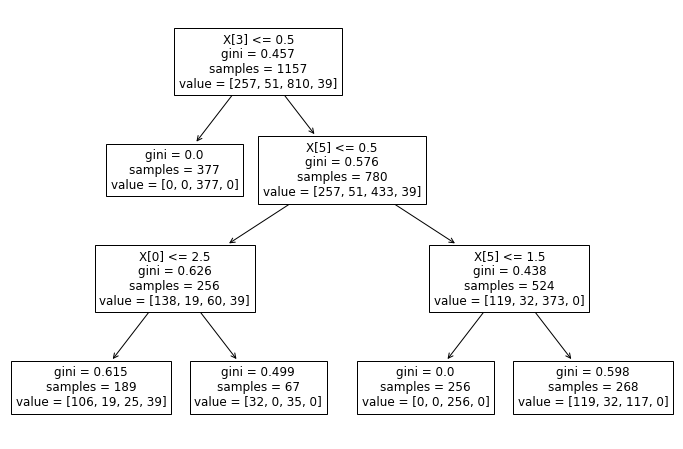

In [133]:
plt.figure(figsize=(12,8))

from sklearn.tree import plot_tree
plot_tree(cls_ginni.fit(X_train,y_train))

In [134]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier with criterion entropy 

In [135]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [136]:
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [137]:
y_pred=clf_en.predict(X_test)


In [138]:
from sklearn.metrics import accuracy_score

In [139]:
print('model accurecy with entropy criterion:',accuracy_score(y_test,y_pred))

model accurecy with entropy criterion: 0.7964912280701755


# Compare the train-set and test-set accuracy

In [140]:
y_pred_train=clf_en.predict(X_train)

In [141]:
print('model accurecy with entropy criterion:',accuracy_score(y_train,y_pred_train))

model accurecy with entropy criterion: 0.7718236819360415


In [142]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'entropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.081\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'entropy = 1.408\nsamples = 268\nvalue = [119, 32, 117, 0]')]

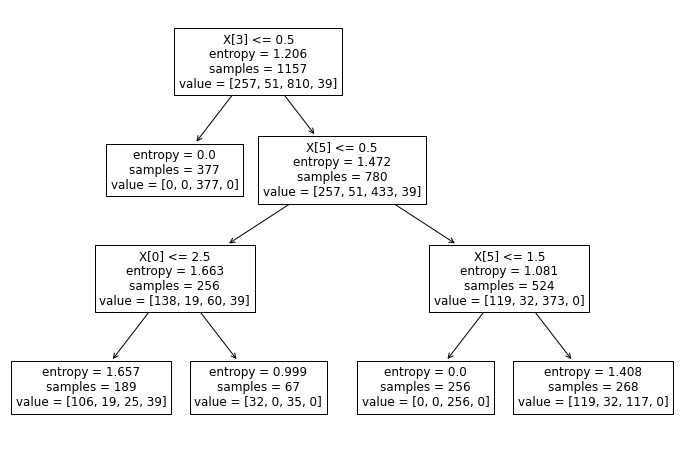

In [143]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# Confusion matrix 

In [144]:
from sklearn.metrics import confusion_matrix

In [145]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n\n",cm)

confusion matrix:

 [[113   0  14   0]
 [ 18   0   0   0]
 [ 58   0 341   0]
 [ 26   0   0   0]]


# Classification Report 

In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.53      0.89      0.66       127
        good       0.00      0.00      0.00        18
       unacc       0.96      0.85      0.90       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.80       570
   macro avg       0.37      0.44      0.39       570
weighted avg       0.79      0.80      0.78       570



d:\Users\durge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\durge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\durge\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results and conclusion